In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv("C:/Users/Umaima/Untitled Folder/bank_data.csv", index_col=0, na_values=["?"])


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Umaima/Untitled Folder/bank_data.csv'

### Loading and preprocessing the data using Numpy or Pandas and the preprocessing functions from scikit-learn. Specifically, you need to separate the target attribute ("pep") from the portion of the data to be used for training and testing. You will need to convert the selected dataset into the Standard Spreadsheet format (scikit-learn functions generally assume that all attributes are in numeric form).Finally, you need to split the transformed data into training and test sets (using 80%-20% randomized split).

In [ ]:

df.shape

(600, 11)

In [ ]:
vs = df.reindex(np.random.permutation(df.index))
vs.head(10)

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
id,,,,,,,,,,,
ID12138,36,13381.0,0,FEMALE,RURAL,NO,YES,NO,YES,NO,YES
ID12444,51,19416.8,0,FEMALE,INNER_CITY,YES,NO,YES,YES,NO,NO
ID12629,30,25830.5,2,FEMALE,INNER_CITY,YES,NO,NO,YES,NO,NO
ID12405,67,57398.1,3,FEMALE,RURAL,NO,NO,YES,YES,NO,YES
ID12585,28,21184.7,1,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,YES
ID12689,58,49673.6,0,MALE,RURAL,YES,NO,YES,YES,NO,NO
ID12496,67,23485.9,3,FEMALE,TOWN,YES,YES,NO,NO,YES,NO
ID12325,57,49874.4,3,MALE,RURAL,YES,NO,YES,YES,NO,YES
ID12659,38,31290.6,0,FEMALE,SUBURBAN,YES,NO,YES,YES,NO,NO


In [ ]:
vs_names = vs.columns.values
vs_names

array(['age', 'income', 'children', 'gender', 'region', 'married', 'car',
       'savings_acct', 'current_acct', 'mortgage', 'pep'], dtype=object)

In [ ]:
vs_target = vs.pep


In [ ]:
df.dtypes

age               int64
income          float64
children          int64
gender           object
region           object
married          object
car              object
savings_acct     object
current_acct     object
mortgage         object
pep              object
dtype: object

In [ ]:
vs = pd.get_dummies(df) #generating dummy data
vs.head(10)

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,...,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
id,,,,,,,,,,,,,,,,,,,,,
ID12101,48,17546.00,1,1,0,1,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1
ID12102,40,30085.10,3,0,1,0,0,0,1,0,...,0,1,1,0,0,1,0,1,1,0
ID12103,51,16575.40,0,1,0,1,0,0,0,0,...,0,1,0,1,0,1,1,0,1,0
ID12104,23,20375.40,3,1,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,1,0
ID12105,57,50576.30,0,1,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,1,0
ID12106,57,37869.60,2,1,0,0,0,0,1,0,...,1,0,0,1,0,1,1,0,0,1
ID12107,22,8877.07,0,0,1,0,1,0,0,1,...,1,0,1,0,0,1,1,0,0,1
ID12108,58,24946.60,0,0,1,0,0,0,1,0,...,0,1,0,1,0,1,1,0,1,0
ID12109,37,25304.30,2,1,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
vs_train, vs_test, vs_target_train, vs_target_test = train_test_split(vs, vs_target, test_size=0.2, random_state=33)

print (vs_test.shape)
vs_test[0:5]

(120, 21)


,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,...,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
id,,,,,,,,,,,,,,,,,,,,,
ID12557,32,13267.6,0,1,0,0,0,0,1,0,...,0,1,0,1,0,1,0,1,1,0
ID12467,59,29866.9,1,1,0,1,0,0,0,1,...,0,1,1,0,0,1,1,0,0,1
ID12232,61,41609.5,3,0,1,0,1,0,0,0,...,1,0,0,1,0,1,0,1,1,0
ID12549,53,48971.6,3,0,1,0,1,0,0,0,...,0,1,0,1,1,0,1,0,0,1
ID12438,65,38080.9,1,0,1,1,0,0,0,0,...,0,1,0,1,1,0,0,1,1,0


In [ ]:
print (vs_train.shape)
vs_train[0:5]

(480, 21)


,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,...,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
id,,,,,,,,,,,,,,,,,,,,,
ID12482,46,32583.5,2,1,0,1,0,0,0,0,...,0,1,0,1,0,1,1,0,1,0
ID12105,57,50576.3,0,1,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,1,0
ID12187,25,15525.0,0,1,0,1,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
ID12184,35,16394.4,1,0,1,1,0,0,0,0,...,1,0,0,1,0,1,1,0,0,1
ID12624,34,16291.0,0,1,0,0,0,0,1,0,...,0,1,0,1,1,0,0,1,1,0


In [ ]:
np.set_printoptions(suppress=True, linewidth=120)

vs_train.head(10)

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,...,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
id,,,,,,,,,,,,,,,,,,,,,
ID12482,46,32583.50,2,1,0,1,0,0,0,0,...,0,1,0,1,0,1,1,0,1,0
ID12105,57,50576.30,0,1,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,1,0
ID12187,25,15525.00,0,1,0,1,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
ID12184,35,16394.40,1,0,1,1,0,0,0,0,...,1,0,0,1,0,1,1,0,0,1
ID12624,34,16291.00,0,1,0,0,0,0,1,0,...,0,1,0,1,1,0,0,1,1,0
ID12376,18,9362.58,0,0,1,0,1,0,0,0,...,0,1,1,0,0,1,0,1,0,1
ID12700,38,26671.60,0,0,1,0,0,0,1,1,...,0,1,1,0,0,1,0,1,0,1
ID12361,22,17180.20,0,0,1,0,0,1,0,0,...,1,0,0,1,0,1,1,0,1,0
ID12675,43,28469.90,0,1,0,1,0,0,0,0,...,0,1,0,1,0,1,1,0,1,0


In [ ]:
vs_test

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,...,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
id,,,,,,,,,,,,,,,,,,,,,
ID12557,32,13267.6,0,1,0,0,0,0,1,0,...,0,1,0,1,0,1,0,1,1,0
ID12467,59,29866.9,1,1,0,1,0,0,0,1,...,0,1,1,0,0,1,1,0,0,1
ID12232,61,41609.5,3,0,1,0,1,0,0,0,...,1,0,0,1,0,1,0,1,1,0
ID12549,53,48971.6,3,0,1,0,1,0,0,0,...,0,1,0,1,1,0,1,0,0,1
ID12438,65,38080.9,1,0,1,1,0,0,0,0,...,0,1,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID12539,18,12117.3,1,1,0,0,0,1,0,0,...,1,0,1,0,0,1,1,0,1,0
ID12593,61,27756.3,0,1,0,0,0,0,1,0,...,0,1,0,1,1,0,0,1,0,1
ID12278,41,30099.3,0,1,0,1,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1


In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler().fit(vs_train)
vs_train_norm = min_max_scaler.transform(vs_train)
vs_test_norm = min_max_scaler.transform(vs_test) #preprocessing

In [ ]:
np.set_printoptions(precision=2, linewidth=80, suppress=True) #setting precision to 2
vs_train_norm[0:5]

array([[0.57, 0.46, 0.67, 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
        0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 1.  , 0.  ],
       [0.8 , 0.78, 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  ,
        1.  , 0.  , 0.  , 1.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  ],
       [0.14, 0.16, 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
        1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 1.  , 0.  ],
       [0.35, 0.18, 0.33, 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
        1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  ],
       [0.33, 0.18, 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  ,
        0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  , 1.  , 0.  ]])

In [ ]:
vs_test_norm[0:5]

array([[0.29, 0.12, 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  ,
        0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  ],
       [0.84, 0.41, 0.33, 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  ,
        0.  , 1.  , 1.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  ],
       [0.88, 0.62, 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  ,
        1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  ],
       [0.71, 0.75, 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  ,
        0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 1.  , 0.  , 0.  , 1.  ],
       [0.96, 0.56, 0.33, 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
        0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  , 1.  , 0.  ]])

In [ ]:
from sklearn import neighbors, tree, naive_bayes

In [ ]:
n_neighbors = 5 #checking for k 5 intially

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(vs_train_norm, vs_target_train)

KNeighborsClassifier(weights='distance')

In [ ]:
knnpreds_test = knnclf.predict(vs_test_norm)


In [ ]:
print (knnpreds_test)

['YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO'
 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES'
 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES'
 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO'
 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES'
 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES'
 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO']


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(vs_target_test, knnpreds_test))

              precision    recall  f1-score   support

          NO       0.58      0.55      0.56        69
         YES       0.43      0.45      0.44        51

    accuracy                           0.51       120
   macro avg       0.50      0.50      0.50       120
weighted avg       0.51      0.51      0.51       120



The f-test score for YES is 0.44 while for NO its 0.56. The accuracy is 0.51, 51%

### Run scikit-learn's KNN classifier on the test set. Note: in the case of KNN, you should first normalize the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1).Generate the confusion matrix (visualize it using Matplotlib), as well as the classification report. Also, compute the average accuracy score. Experiment with different values of K and the weight parameter (i.e., with or without distance weighting) for KNN to see if you can improve accuracy (you do not need to provide the details of all of your experimentation,but provide a short discussion on what parameters worked best as well as your final results).

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
knncm = confusion_matrix(vs_target_test, knnpreds_test)


In [ ]:
print ("KNN confusion Matrix: ")
print (knncm)

KNN confusion Matrix: 
[[38 31]
 [28 23]]


In [ ]:
print ("KNN Clasification Score test norm: "+str(knnclf.score(vs_test_norm, vs_target_test)))

KNN Clasification Score test norm: 0.5083333333333333


In [ ]:
print ("KNN Clasification Score train norm: "+str(knnclf.score(vs_train_norm, vs_target_train)))

KNN Clasification Score train norm: 1.0


### Decision Tree Classifier

In [ ]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)

In [ ]:
treeclf = treeclf.fit(vs_train, vs_target_train)

In [ ]:
treepreds_test = treeclf.predict(vs_test)
print (treepreds_test)

['YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO'
 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES'
 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO'
 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES'
 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES'
 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO'
 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO'
 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO'
 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES']


In [ ]:
print (treeclf.score(vs_test, vs_target_test))

0.49166666666666664


In [ ]:
print (treeclf.score(vs_train, vs_target_train))

0.975


In [ ]:
print(classification_report(vs_target_test, treepreds_test))

              precision    recall  f1-score   support

          NO       0.57      0.46      0.51        69
         YES       0.42      0.53      0.47        51

    accuracy                           0.49       120
   macro avg       0.50      0.50      0.49       120
weighted avg       0.51      0.49      0.49       120



In [ ]:
treecm = confusion_matrix(vs_target_test, treepreds_test, labels=['YES','NO'])
print (treecm)

[[27 24]
 [37 32]]


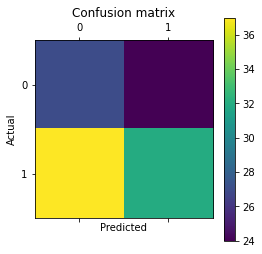

In [ ]:
import pylab as plt
%matplotlib inline
plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Experiment with different values of K and the weight parameter KNN

k = 8,11,20 for weights of both distance and uniform

In [ ]:
n_neighbors = 11

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(vs_train_norm, vs_target_train)
knnpreds_test = knnclf.predict(vs_test_norm)
print(classification_report(vs_target_test, knnpreds_test))
knncm = confusion_matrix(vs_target_test, knnpreds_test)
print("Confusion Martix:")
print(knncm)
print("Score Test")
print (knnclf.score(vs_test_norm, vs_target_test))
print("Score Train")
print (knnclf.score(vs_train_norm, vs_target_train))


              precision    recall  f1-score   support

          NO       0.63      0.62      0.63        69
         YES       0.50      0.51      0.50        51

    accuracy                           0.57       120
   macro avg       0.57      0.57      0.57       120
weighted avg       0.58      0.57      0.58       120

Confusion Martix:
[[43 26]
 [25 26]]
Score Test
0.575
Score Train
1.0


In [ ]:
n_neighbors = 11

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
knnclf.fit(vs_train_norm, vs_target_train)
knnpreds_test = knnclf.predict(vs_test_norm)
print(classification_report(vs_target_test, knnpreds_test))
knncm = confusion_matrix(vs_target_test, knnpreds_test)
print("Confusion Martix:")
print(knncm)
print("Score Test")
print (knnclf.score(vs_test_norm, vs_target_test))
print("Score Train")
print (knnclf.score(vs_train_norm, vs_target_train))

              precision    recall  f1-score   support

          NO       0.60      0.70      0.64        69
         YES       0.47      0.37      0.42        51

    accuracy                           0.56       120
   macro avg       0.54      0.53      0.53       120
weighted avg       0.55      0.56      0.55       120

Confusion Martix:
[[48 21]
 [32 19]]
Score Test
0.5583333333333333
Score Train
0.625


              precision    recall  f1-score   support

          NO       0.63      0.61      0.62        69
         YES       0.49      0.51      0.50        51

    accuracy                           0.57       120
   macro avg       0.56      0.56      0.56       120
weighted avg       0.57      0.57      0.57       120

Score Test
0.5666666666666667
Score Train
1.0
0.5666666666666667
0.975
              precision    recall  f1-score   support

          NO       0.64      0.57      0.60        69
         YES       0.49      0.57      0.53        51

    accuracy                           0.57       120
   macro avg       0.57      0.57      0.56       120
weighted avg       0.58      0.57      0.57       120



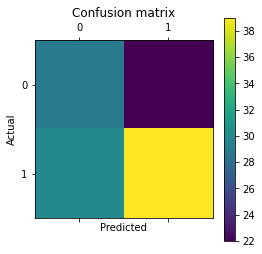

In [ ]:
n_neighbors = 8

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(vs_train_norm, vs_target_train)
knnpreds_test = knnclf.predict(vs_test_norm)
print(classification_report(vs_target_test, knnpreds_test))
knncm = confusion_matrix(vs_target_test, knnpreds_test)
print("Confusion Martix:")
print(knncm)
print("Score Test")
print (knnclf.score(vs_test_norm, vs_target_test))
print("Score Train")
print (knnclf.score(vs_train_norm, vs_target_train))


In [ ]:
n_neighbors = 8

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
knnclf.fit(vs_train_norm, vs_target_train)
knnpreds_test = knnclf.predict(vs_test_norm)
print(classification_report(vs_target_test, knnpreds_test))
knncm = confusion_matrix(vs_target_test, knnpreds_test)
print("Confusion Martix:")
print(knncm)
print("Score Test")
print (knnclf.score(vs_test_norm, vs_target_test))
print("Score Train")
print (knnclf.score(vs_train_norm, vs_target_train))

              precision    recall  f1-score   support

          NO       0.57      0.75      0.65        69
         YES       0.41      0.24      0.30        51

    accuracy                           0.53       120
   macro avg       0.49      0.49      0.47       120
weighted avg       0.50      0.53      0.50       120

Confusion Martix:
[[52 17]
 [39 12]]
Score Test
0.5333333333333333
Score Train
0.65625


In [ ]:
n_neighbors =20

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(vs_train_norm, vs_target_train)
knnpreds_test = knnclf.predict(vs_test_norm)
print(classification_report(vs_target_test, knnpreds_test))
knncm = confusion_matrix(vs_target_test, knnpreds_test)
print("Confusion Martix:")
print(knncm)
print("Score Test:")
print (knnclf.score(vs_test_norm, vs_target_test))
print("Score Train:")
print (knnclf.score(vs_train_norm, vs_target_train))


              precision    recall  f1-score   support

          NO       0.61      0.64      0.62        69
         YES       0.48      0.45      0.46        51

    accuracy                           0.56       120
   macro avg       0.55      0.54      0.54       120
weighted avg       0.56      0.56      0.56       120

Confusion Martix:
[[44 25]
 [28 23]]
Score Test:
0.5583333333333333
Score Train:
1.0


In [ ]:
n_neighbors =20

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
knnclf.fit(vs_train_norm, vs_target_train)
knnpreds_test = knnclf.predict(vs_test_norm)
print(classification_report(vs_target_test, knnpreds_test))
knncm = confusion_matrix(vs_target_test, knnpreds_test)
print("Confusion Martix:")
print(knncm)
print("Score Test:")
print (knnclf.score(vs_test_norm, vs_target_test))
print("Score Train:")
print (knnclf.score(vs_train_norm, vs_target_train))

              precision    recall  f1-score   support

          NO       0.56      0.71      0.63        69
         YES       0.39      0.25      0.31        51

    accuracy                           0.52       120
   macro avg       0.48      0.48      0.47       120
weighted avg       0.49      0.52      0.49       120

Confusion Martix:
[[49 20]
 [38 13]]
Score Test:
0.5166666666666667
Score Train:
0.58125


We can see a significant changes in the training score when the weights were uniform as comapred to distance, the accuracy above 50 percent in all but less when K is increased

### Repeat the classification using scikit-learn's decision tree classifier (using the default parameters) and the Naive Bayes (Gaussian) classifier. As above, generate the confusion matrix, classification report, and average accuracyscores for each classifier. For each model, compare the average accuracy scores on the test and the training data sets. What does the comparison tell you in terms of bias-variance trade-off?

Score Test: 0.5083333333333333
Score Train: 0.8833333333333333
              precision    recall  f1-score   support

          NO       0.57      0.58      0.58        69
         YES       0.42      0.41      0.42        51

    accuracy                           0.51       120
   macro avg       0.50      0.50      0.50       120
weighted avg       0.51      0.51      0.51       120



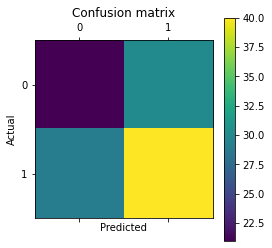

In [ ]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=8)
treeclf = treeclf.fit(vs_train, vs_target_train)
treepreds_test = treeclf.predict(vs_test)
print ("Score Test: "+str(treeclf.score(vs_test, vs_target_test)))
print ("Score Train: "+str(treeclf.score(vs_train, vs_target_train)))
print(classification_report(vs_target_test, treepreds_test))
treecm = confusion_matrix(vs_target_test, treepreds_test, labels=['YES','NO'])

%matplotlib inline
plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

The accuracy Score on Test set is 0.508 while Score Train: 0.883. By looking at the confusion matrix we can see that the accuracy is that most values are between 32 and below while only one yellow box that is around 40

Score Test: 0.5416666666666666
Score Train: 0.8458333333333333
              precision    recall  f1-score   support

          NO       0.59      0.64      0.62        69
         YES       0.46      0.41      0.43        51

    accuracy                           0.54       120
   macro avg       0.53      0.52      0.52       120
weighted avg       0.54      0.54      0.54       120



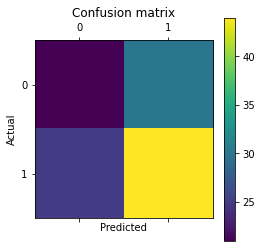

In [ ]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=12)
treeclf = treeclf.fit(vs_train, vs_target_train)
treepreds_test = treeclf.predict(vs_test)
print ("Score Test: "+str(treeclf.score(vs_test, vs_target_test)))
print ("Score Train: "+str(treeclf.score(vs_train, vs_target_train)))
print(classification_report(vs_target_test, treepreds_test))
treecm = confusion_matrix(vs_target_test, treepreds_test, labels=['YES','NO'])

%matplotlib inline
plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

By looking at the confusion matrix we can see that the accuracy is that most values are between 35 and below while only one yellow box that is above 40

Score Test: 0.5333333333333333
Score Train: 0.7791666666666667
              precision    recall  f1-score   support

          NO       0.58      0.65      0.62        69
         YES       0.44      0.37      0.40        51

    accuracy                           0.53       120
   macro avg       0.51      0.51      0.51       120
weighted avg       0.52      0.53      0.53       120



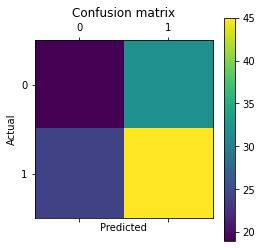

In [ ]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=18)
treeclf = treeclf.fit(vs_train, vs_target_train)
treepreds_test = treeclf.predict(vs_test)
print ("Score Test: "+str(treeclf.score(vs_test, vs_target_test)))
print ("Score Train: "+str(treeclf.score(vs_train, vs_target_train)))
print(classification_report(vs_target_test, treepreds_test))
treecm = confusion_matrix(vs_target_test, treepreds_test, labels=['YES','NO'])

%matplotlib inline
plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

By looking at the confusion matrix with min split of 18 we can see that the accuracy is that most values are between 35 while only one yellow box that is around above 42

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=17f06124-1663-44ac-81e3-bfdb2fd3bd2c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>